# Getting started with PyProBE

In [1]:
import pyprobe

## Convert data to standard format

Create the cell object and load some data. If this is the first time that the data has been loaded, it must first be converted into the standard format for PyProBE.

In [2]:
# Describe the cell. Required fields are 'Name'.
info_dictionary = {'Name': 'Sample cell',
                   'Chemistry': 'NMC622',
                   'Nominal Capacity [Ah]': 0.04,
                   'Cycler number': 1,
                   'Channel number': 1,}

# Create a cell object
cell = pyprobe.Cell(info=info_dictionary)

data_directory = '../../../tests/sample_data/neware'

# Uncomment if running locally
# cell.process_cycler_file(cycler='neware',
#                          folder_path=data_directory,
#                          input_filename='sample_data_neware.xlsx',
#                          output_filename='sample_data_neware.parquet')

If a parquet file exists alongside the original data file, you can add it as a Procedure object to the procedure dictionary of the cell. The key of the dictionary is the procedure name that you provide.

In [3]:
cell.add_procedure(procedure_name='Sample',
                   folder_path = data_directory,
                   filename = 'sample_data_neware.parquet')

print(cell.procedure)

{'Sample': Procedure(base_dataframe=<LazyFrame at 0x7F93D819B2D0>, info={'Name': 'Sample cell', 'Chemistry': 'NMC622', 'Nominal Capacity [Ah]': 0.04, 'Cycler number': 1, 'Channel number': 1, 'color': '#ff00ff'}, column_definitions={'Date': 'The timestamp of the data point. Type: datetime.', 'Time [s]': 'The time passed from the start of the procedure.', 'Current [A]': 'The current through the cell.', 'Voltage [V]': 'The terminal voltage.', 'Capacity [Ah]': 'The net charge passed since the start of the procedure.', 'Procedure Time [s]': 'Time elapsed since beginning of procedure.', 'Procedure Capacity [Ah]': 'The net charge passed since beginning of procedure.'}, titles=['Initial Charge', 'Break-in Cycles', 'Discharge Pulses'], steps_idx=[[1, 2, 3], [4, 5, 6, 7], [9, 10, 11, 12]], pybamm_experiment=pybamm.Experiment([('Rest for 4 hours', 'Charge at 4mA until 4.2 V', 'Hold at 4.2 V until 0.04 A', 'Rest for 2 hours'), ('Discharge at 4 mA until 3 V', 'Rest for 2 hours', 'Charge at 4 mA unt

The dashboard can be launched immediately (uncomment to run when outside docs environment):

In [4]:
# pyprobe.Cell.launch_dashboard([cell])

The raw data is accessible as a dataframe with the data property:

In [5]:
print(cell.procedure['Sample'].data)

shape: (789_589, 11)
┌─────────────┬────────────┬───────┬──────┬───┬─────────────┬────────────┬────────────┬────────────┐
│ Date        ┆ Time [s]   ┆ Cycle ┆ Step ┆ … ┆ Capacity    ┆ Temperatur ┆ Procedure  ┆ Procedure  │
│ ---         ┆ ---        ┆ ---   ┆ ---  ┆   ┆ [Ah]        ┆ e [C]      ┆ Time [s]   ┆ Capacity   │
│ datetime[ms ┆ f64        ┆ i64   ┆ i64  ┆   ┆ ---         ┆ ---        ┆ ---        ┆ [Ah]       │
│ ]           ┆            ┆       ┆      ┆   ┆ f64         ┆ null       ┆ f64        ┆ ---        │
│             ┆            ┆       ┆      ┆   ┆             ┆            ┆            ┆ f64        │
╞═════════════╪════════════╪═══════╪══════╪═══╪═════════════╪════════════╪════════════╪════════════╡
│ 2024-02-29  ┆ 0.0        ┆ 0     ┆ 2    ┆ … ┆ 0.04139     ┆ null       ┆ 0.0        ┆ 0.0        │
│ 09:20:29.09 ┆            ┆       ┆      ┆   ┆             ┆            ┆            ┆            │
│ 4           ┆            ┆       ┆      ┆   ┆             ┆         

Individual columns can be returned as 1D numpy arrays with the `get()` method:

In [6]:
current = cell.procedure['Sample'].experiment('Break-in Cycles').charge(0).get('Current [A]')
print(type(current), current)

<class 'numpy.ndarray'> [0.00399931 0.00400001 0.00400004 ... 0.00040614 0.0004023  0.0004    ]


Multiple columns can be returned at once:

In [7]:
current, voltage = cell.procedure['Sample'].experiment('Break-in Cycles').charge(0).get('Current [A]', 'Voltage [V]')
print("Current = ", current)
print("Voltage = ", voltage)

Current =  [0.00399931 0.00400001 0.00400004 ... 0.00040614 0.0004023  0.0004    ]
Voltage =  [3.2895 3.2962 3.2979 ... 4.2001 4.2001 4.2001]


And different unit can be returned on command:

In [8]:
current_mA = cell.procedure['Sample'].experiment('Break-in Cycles').charge(0).get('Current [mA]')
print("Current [mA] = ", current_mA)

Current [mA] =  [3.99931 4.00001 4.00004 ... 0.40614 0.4023  0.4    ]


Any part of the procedure can be plotted quickly using the ```add_line``` method:

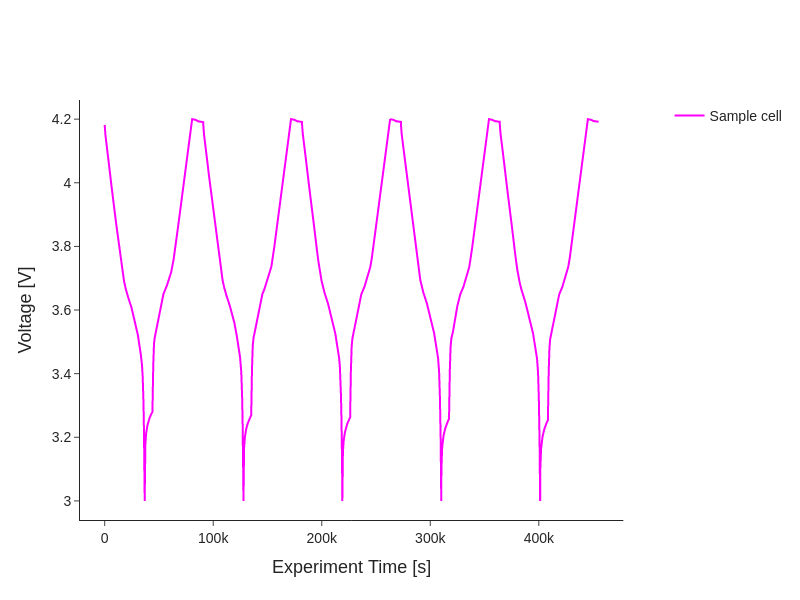

In [9]:
figure = pyprobe.Plot()
figure.add_line(cell.procedure['Sample'].experiment('Break-in Cycles'), 'Experiment Time [s]', 'Voltage [V]')
figure.show_image()
# figure.show() # This will show the plot interactively, it is commented out for the sake of the documentation


We can use the `analysis` to further analyse the data. For the `'Break-in Cycles'` we will use the `Cycling` analysis module. You first create the analysis object by calling the `Cycling` class on the filtered section of your procedure:

In [10]:
from pyprobe.analysis.cycling import Cycling
cycling = Cycling(input_data = cell.procedure['Sample'].experiment('Break-in Cycles'))
print(cycling)

input_data=Experiment(base_dataframe=shape: (455_167, 13)
┌─────────────┬────────────┬───────┬──────┬───┬─────────────┬────────────┬────────────┬────────────┐
│ Date        ┆ Time [s]   ┆ Cycle ┆ Step ┆ … ┆ Procedure   ┆ Procedure  ┆ Experiment ┆ Experiment │
│ ---         ┆ ---        ┆ ---   ┆ ---  ┆   ┆ Time [s]    ┆ Capacity   ┆ Time [s]   ┆ Capacity   │
│ datetime[ms ┆ f64        ┆ i64   ┆ i64  ┆   ┆ ---         ┆ [Ah]       ┆ ---        ┆ [Ah]       │
│ ]           ┆            ┆       ┆      ┆   ┆ f64         ┆ ---        ┆ f64        ┆ ---        │
│             ┆            ┆       ┆      ┆   ┆             ┆ f64        ┆            ┆ f64        │
╞═════════════╪════════════╪═══════╪══════╪═══╪═════════════╪════════════╪════════════╪════════════╡
│ 2024-02-29  ┆ 28448.2    ┆ 0     ┆ 4    ┆ … ┆ 28448.2     ┆ 0.02036    ┆ 0.0        ┆ 0.0        │
│ 17:14:37.29 ┆            ┆       ┆      ┆   ┆             ┆            ┆            ┆            │
│ 4           ┆            ┆     

These methods return `Result` objects, so they can be displayed as normal:

In [11]:
print(type(cycling.summary()))

print(cycling.summary().data)

<class 'pyprobe.result.Result'>
shape: (5, 8)
┌───────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┐
│ Cycle ┆ Capacity   ┆ Time [s]   ┆ Charge     ┆ Discharge  ┆ SOH Charge ┆ SOH        ┆ Coulombic  │
│ ---   ┆ Throughput ┆ ---        ┆ Capacity   ┆ Capacity   ┆ [%]        ┆ Discharge  ┆ Efficiency │
│ i64   ┆ [Ah]       ┆ f64        ┆ [Ah]       ┆ [Ah]       ┆ ---        ┆ [%]        ┆ ---        │
│       ┆ ---        ┆            ┆ ---        ┆ ---        ┆ f64        ┆ ---        ┆ f64        │
│       ┆ f64        ┆            ┆ f64        ┆ f64        ┆            ┆ f64        ┆            │
╞═══════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╡
│ 0     ┆ 0.0        ┆ 28448.2    ┆ 0.041086   ┆ 0.040937   ┆ 100.0      ┆ 100.0      ┆ null       │
│ 1     ┆ 0.082022   ┆ 119273.495 ┆ 0.041247   ┆ 0.041138   ┆ 100.393179 ┆ 100.490732 ┆ 1.001267   │
│ 2     ┆ 0.164407   ┆ 210305.197 ┆ 0.04132  

And it can be plotted as normal too:

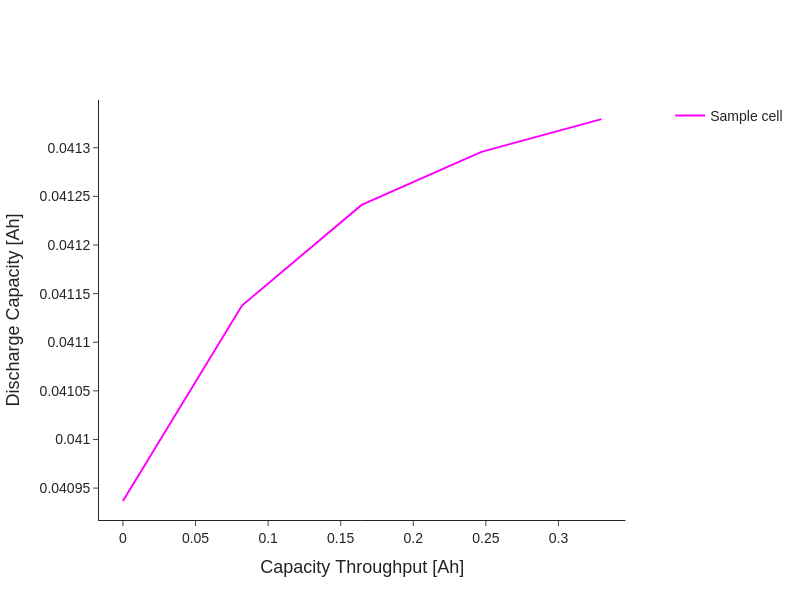

In [12]:
figure = pyprobe.Plot()
figure.add_line(cycling.summary(), 
                x = 'Capacity Throughput [Ah]', 
                y = 'Discharge Capacity [Ah]')
figure.show_image()
# figure.show() # This will show the plot interactively, it is commented out for the sake of the documentation